In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The bouncing ball

<hr/>

### Georgi Z. Stoyanov

#### 2019.05.23

In [3]:
import vpython as vp

<IPython.core.display.Javascript object>

## Abstract
This article describes the attempt to show you the magic of mathematics science and how it lies at the heart of everything in real life: from a bouncing ball to the limits of the universe! You will also meet with the most scientific programming language - Python. You will actually understand how difficult it is to recreate the behavior of a simple bouncy ball from the real world! Last but not least, we will mention the concepts of Ordinary Differential Equation, Newton's equations of motion with constant acceleration, Coefficient of restitution, G force and many other things in the world of mathematics.

## Introduction

Most physical phenomena are ultimately described by a relationship between changing quantities, resulting in differential equations. If such an equation only contains one independent variable (such as time) and hence only total derivatives (and no partial derivatives) we classify it as an [ordinary differential equation](http://mathworld.wolfram.com/OrdinaryDifferentialEquation.html) (__ODE__). An ODE of order n contains no derivatives higher than the n-th derivative: 

$$ F(t, y, y^{(1)},  \dots, y^{(n)}) = 0 $$

The *dependent* variable $ y=y(t) $ is a function of the *independent* variable $ t $ and $ y^{(n)} = \frac{d^{n}y}{dt^{n}} $ is the $ n $-th derivative with respect to $ t $. A *linear* ODE only contains first powers of $ y $ or its derivatives. A *non-linear* ODE may contain higher powers. There often exist methods to solve linear ODEs analytically but this is impossible for most non-linear ODEs. Solutions of an ODE are fixed by the initial conditions<sup id="fnref:1"><a href="#fn:1" class="footnote">1</a></sup>, e.g., $ y_0 = y(t_{0}) $ and similar for all higher derivatives. For an ODE of order $ n $, exactly $ n $ initial conditions are needed.

Using ODE integration algorithms (*integrators*) we can solve linear *and* non-linear ODEs of any order *numerically*. The basic idea is to start with the initial conditions and then propagate $ y $ for a small step $ h $ to numerically compute $ y(t_0 + h) $ and all its derivatives. By repeating the process, one *extrapolates* from the initial condition to any "later" value of $ t $.

In this article we will use the simplest integrator, the *Euler algorithm*.

## Bouncing ball with the Euler integrator

In this article we are solving the problem of the bouncing ball with the simplest of all integrators: the forward Euler scheme.

We have to solve the *second order ODE* (Newton's equations of motion with constant acceleration)

$$
\frac{d^2 y}{dt^2} = -g
$$

where $ g $ is the constant acceleration due to gravity<sup id="fnref:2"><a href="#fn:2" class="footnote">2</a></sup> and $ y(t) $ is the position of the ball as a function of time (its
trajectory).

The forward Euler scheme for any *first order ODE*

$$ \frac{dy}{dt} = f(y, t) $$

is

$$ y(t + h) = y(t) + h f(y(t), t). $$

In order to solve the original 2nd order equation of motion we make
use of the fact that one $ n $-th order ODE can be written as $ n $
coupled first order ODEs, namely

$$
\begin{align}
\frac{dy}{dt} &= v\\
\frac{dv}{dt} &= -g.
\end{align} $$

Solve each of the first order ODEs with the Euler algorithm:

$$
\begin{align}
y(t + h) &= y(t) + h v(t)\\
v(t + h) &= v(t) - h g.
\end{align} $$


### Simple simulation for free fall

In [4]:
g = -9.81
y = 0.0
v = 0.0

t = 0
dt = 0.01

data = []

while t < 10:
    y += v*dt
    v += g*dt
    data.append([t, y, v]) 
    t += dt

data = np.array(data) 

In [5]:
data.shape

(1001, 3)

In [6]:
data = data.transpose()
data.shape  # t, y, v

(3, 1001)

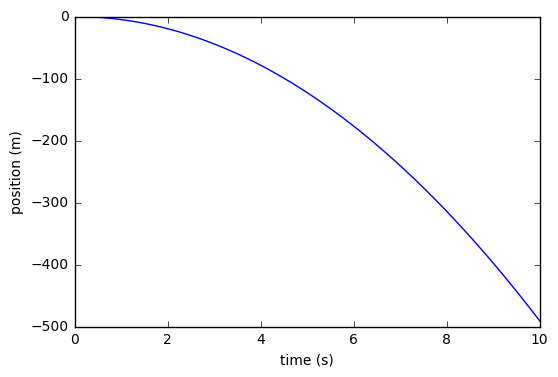

In [7]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

### Simple simulation for bouncing

Add a floor at  𝑦=−5.

In [8]:
g = -9.81
y = 0.0
v = 0.0

t = 0
dt = 0.01

y_floor = -5

data = []

while t < 10:
    y += v*dt
    if y > y_floor:
        v += g*dt
    else:
        v = -v   # bounce off floor
    data.append([t, y, v]) 
    t += dt

data = np.array(data).transpose()

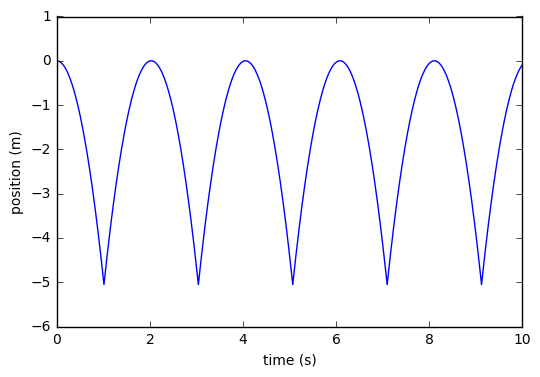

In [9]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

What happens at the floor? – The velocity changes (elastic collision).

### Coefficient of restitution
From what we have seen so far, we can see that the behavior of the ball is not what we would expect in the real world. The reasons for this are many, and one of them is called [__Coefficient of restitution__](https://en.wikipedia.org/wiki/Coefficient_of_restitution) (__COR__).

The COR, also denoted by ($e$), is the ratio of the final to initial relative velocity between two objects after they collide. It normally ranges from 0 to 1 where 1 would be a perfectly elastic collision. A perfectly inelastic collision has a coefficient of 0, but a 0 value does not have to be perfectly inelastic. It is measured in the [Leeb rebound hardness test](https://en.wikipedia.org/wiki/Leeb_rebound_hardness_test), expressed as 1000 times the COR, but it is only a valid COR for the test, not as a universal COR for the material being tested.

The value is almost always less than one due to initial translational kinetic energy being lost to rotational kinetic energy, plastic deformation, and heat. It can be more than 1 if there is an energy gain during the collision from a chemical reaction, a reduction in rotational energy, or another [internal energy](https://en.wikipedia.org/wiki/Internal_energy) decrease that contributes to the post-collision velocity.

$$
{\text{Coefficient  of  restitution }}(e)={\frac {\text{Relative  velocity  after  collision}}{\text{ Relative  velocity  before  collision}}}
$$

The coefficient is related to (relative) kinetic energy by $ e={\sqrt {\frac {KE_{\text{(after collision)}}}{KE_{\text{(before collision)}}}}}$

The mathematics were developed by Sir [Isaac Newton](https://en.wikipedia.org/wiki/Isaac_Newton) in 1687.<sup id="fnref:3"><a href="#fn:3" class="footnote">3</a></sup> It is also known as Newton's experimental law.

__Line of impact__ – It is the line along which e is defined or in absence of tangential reaction force between colliding surfaces, force of impact is shared along this line between bodies. During physical contact between bodies during impact its line along common normal to pair of surfaces in contact of colliding bodies. Hence e is defined as a dimensionless one-dimensional parameter.

__Range of values for e – treated as a constant__

$\pmb{e}$ is usually a positive, real number between 0 and 1:

$\pmb{e = 0}$: This is a perfectly *inelastic collision*. This means kinetic energy along the common normal is 0. Kinetic energy is converted to heat or work done in deforming the objects.

$\pmb{0 < e < 1}$: This is a real-world *inelastic collision*, in which some kinetic energy is dissipated.

$\pmb{e = 1}$: This is a perfectly *elastic collision*, in which no kinetic energy is dissipated, and the objects rebound from one another with the same relative speed with which they approached.

$\pmb{e < 0}$: A COR less than zero would represent a collision in which the separation velocity of the objects has the same direction (sign) as the closing velocity, implying the objects passed through one another without fully engaging. This may also be thought of as an incomplete transfer of momentum. An example of this might be a small, dense object passing through a large, less dense one – e.g., a bullet passing through a target, or a motorcycle passing through a motor home or a wave tearing through a dam.

$\pmb{e > 1}$: This would represent a collision in which energy is released, for example, [nitrocellulose](https://en.wikipedia.org/wiki/Nitrocellulose) billiard balls can literally explode at the point of impact. Also, some recent articles have described superelastic collisions in which it is argued that the COR can take a value greater than one in a special case of oblique collisions.<sup id="fnref:4"><a href="#fn:4" class="footnote">4</a></sup><sup id="fnref:5"><a href="#fn:5" class="footnote">5</a></sup><sup id="fnref:6"><a href="#fn:6" class="footnote">6</a></sup> These phenomena are due to the change of rebound trajectory caused by friction. In such collision kinetic energy is increased in a manner energy is released in some sort of explosion. It is possible that $e=\infty$ for a perfect explosion of a rigid system.

__Maximum deformation phase__ – In any collision for $0 < e ≤ 1$, there is a condition when for short moment along line of impact colliding bodies have same velocity when its condition of kinetic energy is lost in maximum fraction as heat, sound and light with deformation potential energy. For this short duration this collision $e=0$ and may be referred as inelastic phase.

### Experiments
For the purpose of the next experiments, let's make a function to produce them.

In [10]:
def bouncingBall(g: 'gravity value of g(m/s2)',
                 y: 'vertical position',
                 v: 'velocity',
                 t: 'time',
                 dt: 'time step',
                 y_floor: 'floor position',
                 e: 'Coefficient of restitution',
                 interval: 'time interval',
                 title: 'name of experiment'):    
   
    data = []
    
    while t < interval:
        y += v*dt
        if y > y_floor:
            v += g*dt
        else:
            v=-e*v # bounce off floor with Coefficient of restitution - COR 
        data.append([t, y, v]) 
        t += dt
    
    data = np.array(data).transpose()
    plt.plot(data[0], data[1])
    plt.title(title)
    plt.xlabel("time (s)")
    plt.ylabel("position (m)")

Let's check our function:

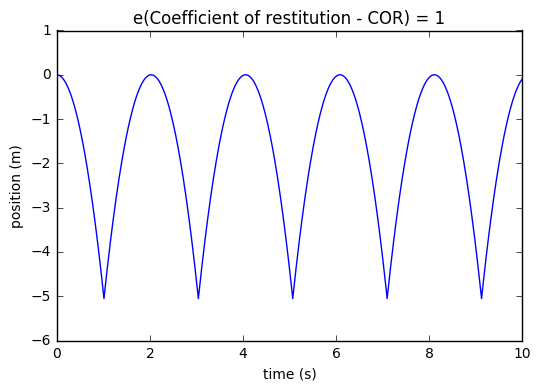

In [11]:
bouncingBall(-9.81, 0, 0, 0, 0.01, -5, 1, 10, "e(Coefficient of restitution - COR) = 1")

It looks like it works properly. Once we have submitted a Coefficient of Restitution = 1 (This is a perfectly elastic collision, in which no __kinetic energy is dissipated__, and the objects rebound from one another with the same relative speed with which they approached.), the result is as it was until now. 

Let's try with $e=0$ - perfectly __inelastic__ collision:

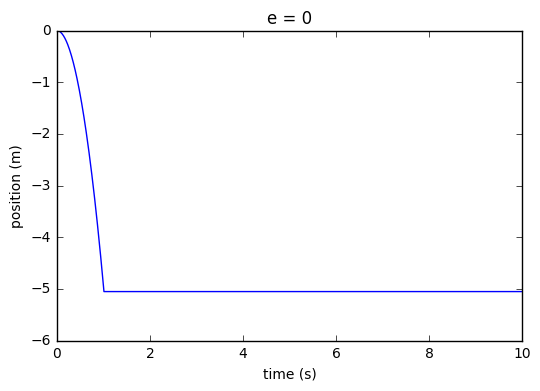

In [12]:
bouncingBall(-9.81, 0, 0, 0, 0.01, -5, 0, 10, "e = 0")

OMG!!! What a huge steel ball we throw? There is no bounce!

What would happen if we try with $e>1$ - collision in which __energy is released__:

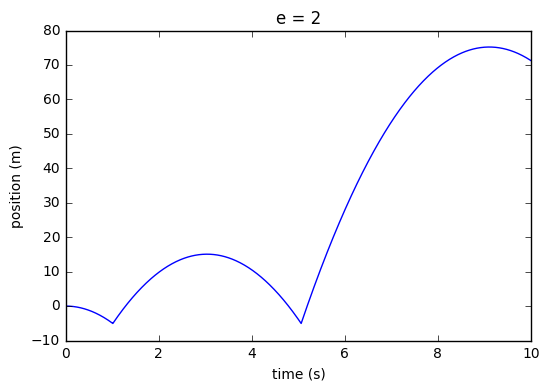

In [13]:
bouncingBall(-9.81, 0, 0, 0, 0.01, -5, 2, 10, "e = 2")

WOW!!! __How much time we will need to get to Saturn__ for example? :)

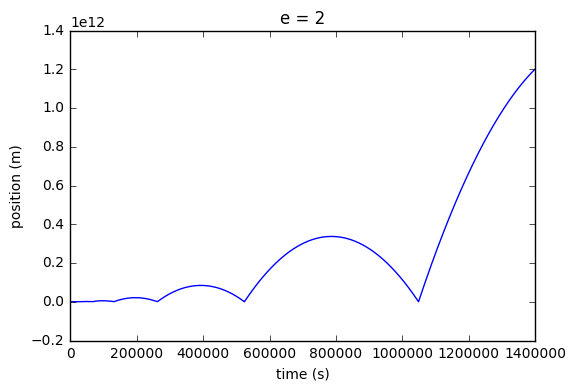

In [14]:
bouncingBall(-9.81, 0, 0, 0, 1, -5, 2, 1400000, "e = 2")

Less then 16 days ;). In this experiment we increase time step to compute result faster. Let's bear in mind that by moving away from the planet earth the value of g(m / s2) decreases drastically, so we might get faster (*I'm not sure for this assumption :)*)!

And now we try with a few __real world subjects - sports balls bounced off a steel surface__:

__1. Cricket Ball__ - Coefficient of restitution = from 0.615 to 0.606 __approx 0.61__

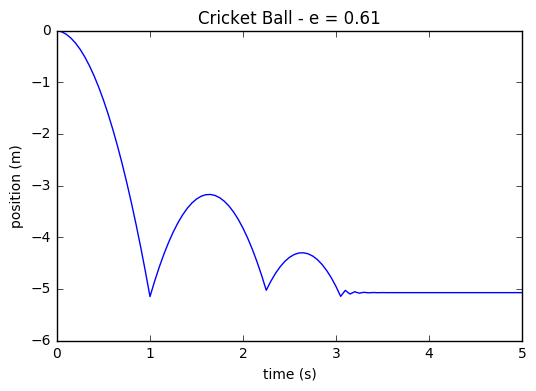

In [15]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.61, 5, "Cricket Ball - e = 0.61")

__2. Hockey Ball__ - Coefficient of restitution = from 0.647 to 0.628 __approx 0.636__

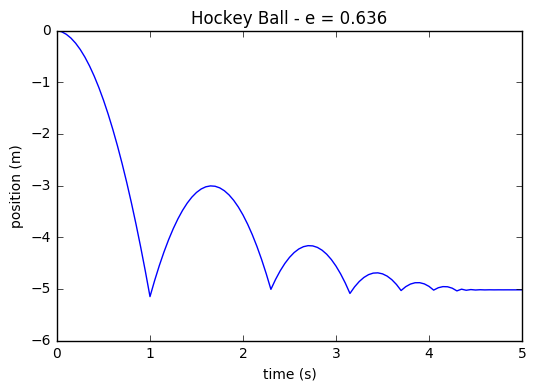

In [16]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.636, 5, "Hockey Ball - e = 0.636")

__3. Table Tennis Ball__ - Coefficient of restitution = from 0.809 to 0.779 __approx 0.794__

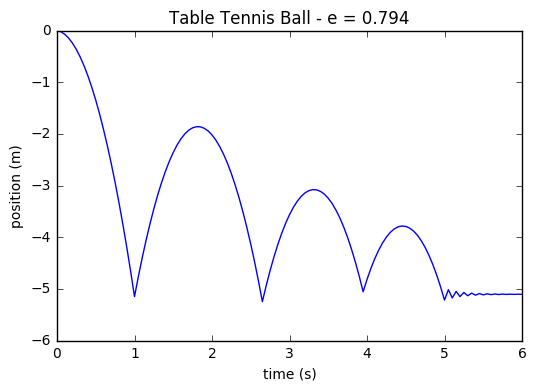

In [17]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.794, 6, "Table Tennis Ball - e = 0.794")

__4. Golf Ball__ - Coefficient of restitution = from 0.897 to 0.889 __approx 0.893__

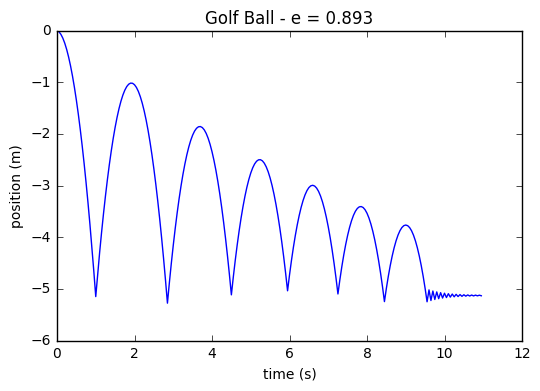

In [ ]:
bouncingBall(-9.81, 0, 0, 0, 0.05, -5, 0.893, 11, "Golf Ball - e = 0.893")

During the sports balls experiments the time interval was increased to visualize the whole behavior of the ball!

## Future work

The experiment described in this article can evolved and refined by working on the following guidelines:

1. Add Coefficient of Restitution for the floor.
2. Add initial horizontal direction of the ball - throw.
3. Speed of the throw.
4. Add walls with Coefficient of Restitution.
5. Add other participants - balls with different Coefficient of Restitution.
6. Let's make the participants heavier :)
7. What happens if we add wind?

...

...

And many more things that surround and embrace us right now. Things from the real world!

## Conclusion

During the experiments in this article, we showed the basics of recreating the behavior of a real-world subject. You have seen that this is not an easy job. We hope through this article to get a spark to ignite your mind and inspiration for new achievements and dreams come true!

## References
1. [10 Ordinary Differential Equations (ODEs)](https://asu-compmethodsphysics-phy494.github.io/ASU-PHY494/2019/02/19/10_ODEs/)
2. [Calculate the trajectory of a ball dropping and bouncing without no drag
force](https://ocw.mit.edu/courses/mechanical-engineering/2-003j-dynamics-and-control-i-fall-2007/matlab-sessions/hw3_sol.pdf)
3. [Coefficient of restitution](https://en.wikipedia.org/wiki/Coefficient_of_restitution)
4. [The Value of g](https://www.physicsclassroom.com/class/circles/Lesson-3/The-Value-of-g)
5. [Ordinary Differential Equation](http://mathworld.wolfram.com/OrdinaryDifferentialEquation.html)
6. [Coefficient of restitution of sports balls: A normal
drop test](https://iopscience.iop.org/article/10.1088/1757-899X/36/1/012038/pdf)
7. [Isaac Newton](https://en.wikipedia.org/wiki/Isaac_Newton)
8. [Leeb rebound hardness test](https://en.wikipedia.org/wiki/Leeb_rebound_hardness_test)
9. [Computational Physics](http://astro.physics.ncsu.edu/urca/course_files/Lesson01/index.html)
10. [Bouncing Ball Experiment](https://community.plu.edu/~dornerbc/teaching/math151/projects/project1/BouncingBall.htm)
11. [BOUNCING BALL SIMULATION (PYTHON RECIPE)](http://code.activestate.com/recipes/502241-bouncing-ball-simulation/)
12. [Internal energy](https://en.wikipedia.org/wiki/Internal_energy)
13. [Nitrocellulose](https://en.wikipedia.org/wiki/Nitrocellulose)

<h4 id="footnotes">Footnotes</h4>
 <br/>
<div class="footnotes">
  <ol>
    <li id="fn:1">
       <p> Solutions to ODEs can also be restricted by <em>boundary conditions</em>
 (values of the solution on the domain boundary) but this leads to
 difficult Eigenvalue problems and will not be considered in this
           article.&#160;<a href="#fnref:1" class="reversefootnote">&#8617;</a></p>
    </li>
      <br/>
    <li id="fn:2">
      <p>The boundary condition at the floor is that the ball bounces back
 elastically, i.e., the velocity is reversed on collision.&#160;<a href="#fnref:2" class="reversefootnote">&#8617;</a></p>
    </li>
      <br/>
    <li id="fn:3">
      <p><span class="reference-text"><cite class="citation journal">Weir, G.; McGavin, P. (8 May 2008). "The coefficient of restitution for the idealized impact of a spherical, nano-scale particle on a rigid plane". <i>Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences</i>. <b>464</b> (2093): 1295–1307. <a href="/wiki/Bibcode" title="Bibcode">Bibcode</a>:<a rel="nofollow" class="external text" href="http://adsabs.harvard.edu/abs/2008RSPSA.464.1295W">2008RSPSA.464.1295W</a>. <a href="/wiki/Digital_object_identifier" title="Digital object identifier">doi</a>:<a rel="nofollow" class="external text" href="//doi.org/10.1098%2Frspa.2007.0289">10.1098/rspa.2007.0289</a>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.jtitle=Proceedings+of+the+Royal+Society+A%3A+Mathematical%2C+Physical+and+Engineering+Sciences&amp;rft.atitle=The+coefficient+of+restitution+for+the+idealized+impact+of+a+spherical%2C+nano-scale+particle+on+a+rigid+plane&amp;rft.volume=464&amp;rft.issue=2093&amp;rft.pages=1295-1307&amp;rft.date=2008-05-08&amp;rft_id=info%3Adoi%2F10.1098%2Frspa.2007.0289&amp;rft_id=info%3Abibcode%2F2008RSPSA.464.1295W&amp;rft.aulast=Weir&amp;rft.aufirst=G.&amp;rft.au=McGavin%2C+P.&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ACoefficient+of+restitution" class="Z3988"></span><style data-mw-deduplicate="TemplateStyles:r886058088">.mw-parser-output cite.citation{font-style:inherit}.mw-parser-output .citation q{quotes:"\"""\"""'""'"}.mw-parser-output .citation .cs1-lock-free a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Lock-green.svg/9px-Lock-green.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output .citation .cs1-lock-limited a,.mw-parser-output .citation .cs1-lock-registration a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Lock-gray-alt-2.svg/9px-Lock-gray-alt-2.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output .citation .cs1-lock-subscription a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Lock-red-alt-2.svg/9px-Lock-red-alt-2.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output .cs1-subscription,.mw-parser-output .cs1-registration{color:#555}.mw-parser-output .cs1-subscription span,.mw-parser-output .cs1-registration span{border-bottom:1px dotted;cursor:help}.mw-parser-output .cs1-ws-icon a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wikisource-logo.svg/12px-Wikisource-logo.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output code.cs1-code{color:inherit;background:inherit;border:inherit;padding:inherit}.mw-parser-output .cs1-hidden-error{display:none;font-size:100%}.mw-parser-output .cs1-visible-error{font-size:100%}.mw-parser-output .cs1-maint{display:none;color:#33aa33;margin-left:0.3em}.mw-parser-output .cs1-subscription,.mw-parser-output .cs1-registration,.mw-parser-output .cs1-format{font-size:95%}.mw-parser-output .cs1-kern-left,.mw-parser-output .cs1-kern-wl-left{padding-left:0.2em}.mw-parser-output .cs1-kern-right,.mw-parser-output .cs1-kern-wl-right{padding-right:0.2em}</style></span><a href="#fnref:3" class="reversefootnote">&#8617;</a></p>
    </li>
      <br/>
    <li id="fn:4">
      <p><cite class="citation journal">Louge, Michel; Adams, Michael (2002). "Anomalous behavior of normal kinematic restitution in the oblique impacts of a hard sphere on an elastoplastic plate". <i>Physical Review E</i>. <b>65</b> (2): 021303. <a href="/wiki/Bibcode" title="Bibcode">Bibcode</a>:<a rel="nofollow" class="external text" href="http://adsabs.harvard.edu/abs/2002PhRvE..65b1303L">2002PhRvE..65b1303L</a>. <a href="/wiki/Digital_object_identifier" title="Digital object identifier">doi</a>:<a rel="nofollow" class="external text" href="//doi.org/10.1103%2FPhysRevE.65.021303">10.1103/PhysRevE.65.021303</a>. <a href="/wiki/PubMed_Identifier" class="mw-redirect" title="PubMed Identifier">PMID</a>&nbsp;<a rel="nofollow" class="external text" href="//www.ncbi.nlm.nih.gov/pubmed/11863512">11863512</a>.</cite>&#160;<a href="#fnref:4" class="reversefootnote">&#8617;</a></p>
    </li>
      <br/>
    <li id="fn:5">
      <p><span class="reference-text"><cite class="citation journal">Kuninaka, Hiroto; Hayakawa, Hisao (2004). "Anomalous Behavior of the Coefficient of Normal Restitution in Oblique Impact". <i>Physical Review Letters</i>. <b>93</b> (15): 154301. <a href="/wiki/ArXiv" title="ArXiv">arXiv</a>:<span class="cs1-lock-free" title="Freely accessible"><a rel="nofollow" class="external text" href="//arxiv.org/abs/cond-mat/0310058">cond-mat/0310058</a></span>. <a href="/wiki/Bibcode" title="Bibcode">Bibcode</a>:<a rel="nofollow" class="external text" href="http://adsabs.harvard.edu/abs/2004PhRvL..93o4301K">2004PhRvL..93o4301K</a>. <a href="/wiki/Digital_object_identifier" title="Digital object identifier">doi</a>:<a rel="nofollow" class="external text" href="//doi.org/10.1103%2FPhysRevLett.93.154301">10.1103/PhysRevLett.93.154301</a>. <a href="/wiki/PubMed_Identifier" class="mw-redirect" title="PubMed Identifier">PMID</a>&nbsp;<a rel="nofollow" class="external text" href="//www.ncbi.nlm.nih.gov/pubmed/15524884">15524884</a>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.jtitle=Physical+Review+Letters&amp;rft.atitle=Anomalous+Behavior+of+the+Coefficient+of+Normal+Restitution+in+Oblique+Impact&amp;rft.volume=93&amp;rft.issue=15&amp;rft.pages=154301&amp;rft.date=2004&amp;rft_id=info%3Aarxiv%2Fcond-mat%2F0310058&amp;rft_id=info%3Apmid%2F15524884&amp;rft_id=info%3Adoi%2F10.1103%2FPhysRevLett.93.154301&amp;rft_id=info%3Abibcode%2F2004PhRvL..93o4301K&amp;rft.aulast=Kuninaka&amp;rft.aufirst=Hiroto&amp;rft.au=Hayakawa%2C+Hisao&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ACoefficient+of+restitution" class="Z3988"></span><link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r886058088"></span>&#160;<a href="#fnref:5" class="reversefootnote">&#8617;</a></p>
    </li>
      <br/>
    <li id="fn:6">
      <p><span class="reference-text"><cite class="citation journal">Calsamiglia, J.; Kennedy, S. W.; Chatterjee, A.; Ruina, A.; Jenkins, J. T. (1999). "Anomalous Frictional Behavior in Collisions of Thin Disks". <i>Journal of Applied Mechanics</i>. <b>66</b> (1): 146. <a href="/wiki/Bibcode" title="Bibcode">Bibcode</a>:<a rel="nofollow" class="external text" href="http://adsabs.harvard.edu/abs/1999JAM....66..146C">1999JAM....66..146C</a>. <a href="/wiki/CiteSeerX" title="CiteSeerX">CiteSeerX</a>&nbsp;<span class="cs1-lock-free" title="Freely accessible"><a rel="nofollow" class="external text" href="//citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.467.8358">10.1.1.467.8358</a></span>. <a href="/wiki/Digital_object_identifier" title="Digital object identifier">doi</a>:<a rel="nofollow" class="external text" href="//doi.org/10.1115%2F1.2789141">10.1115/1.2789141</a>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.jtitle=Journal+of+Applied+Mechanics&amp;rft.atitle=Anomalous+Frictional+Behavior+in+Collisions+of+Thin+Disks&amp;rft.volume=66&amp;rft.issue=1&amp;rft.pages=146&amp;rft.date=1999&amp;rft_id=%2F%2Fciteseerx.ist.psu.edu%2Fviewdoc%2Fsummary%3Fdoi%3D10.1.1.467.8358&amp;rft_id=info%3Adoi%2F10.1115%2F1.2789141&amp;rft_id=info%3Abibcode%2F1999JAM....66..146C&amp;rft.aulast=Calsamiglia&amp;rft.aufirst=J.&amp;rft.au=Kennedy%2C+S.+W.&amp;rft.au=Chatterjee%2C+A.&amp;rft.au=Ruina%2C+A.&amp;rft.au=Jenkins%2C+J.+T.&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ACoefficient+of+restitution" class="Z3988"></span><link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r886058088"></span>&#160;<a href="#fnref:6" class="reversefootnote">&#8617;</a></p>
    </li>
  </ol>
</div>

#### Тhe magical intro ;)

In [1]:
g = -9.81
y = 0
v = 0

t = 0
dt = 0.01

y_floor = -5

# grahics objects
ball = vp.sphere(pos=vp.vector(0, y, 0), radius=1, color=vp.color.yellow)
floor = vp.box(pos=vp.vector(0, y_floor, 0), length=8, height=0.2, width=4)

while True:
    y += v*dt
    ball.pos.y = y
    if y > y_floor + ball.radius:
        v += g*dt
    else:
        v = -v   # bounce off floor
    t += dt
    vp.rate(100)

NameError: name 'vp' is not defined